In [ ]:
"""
File Name: feature_stat_analysis.ipynb

Description: analysis of features.

Author: junghwan lee
Email: jhrrlee@gmail.com
Date Created: 2023.09.07

"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import skew
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import feature_stat_lib as fs
from battery_ml_lib import BatteryFeatureImportance
import importlib

In [2]:
from pathlib import Path
gen_path = Path('..') / 'resource' / 'dataset'
new_cycle_sum_path = gen_path / 'new_cycle_sum.npy'
eol_path = gen_path / 'eol.npy'

In [ ]:
importlib.reload(fs)

In [3]:
new_cycle_sum = np.load(new_cycle_sum_path, allow_pickle=True)

In [4]:
new_cycle_sum.shape

(124, 14, 100)

In [8]:
eol = np.load(eol_path, allow_pickle=True)

In [8]:
eol.shape

(124, 1)

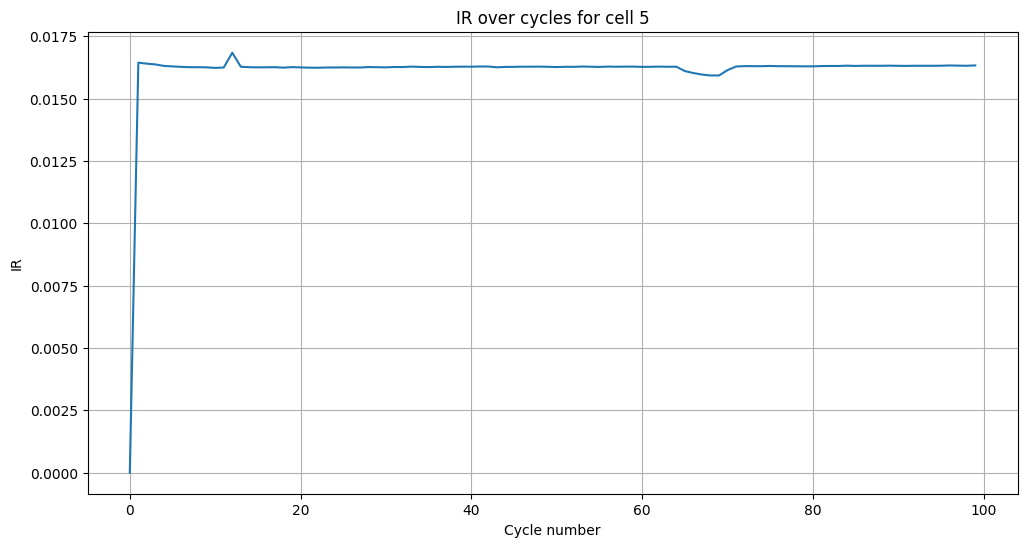

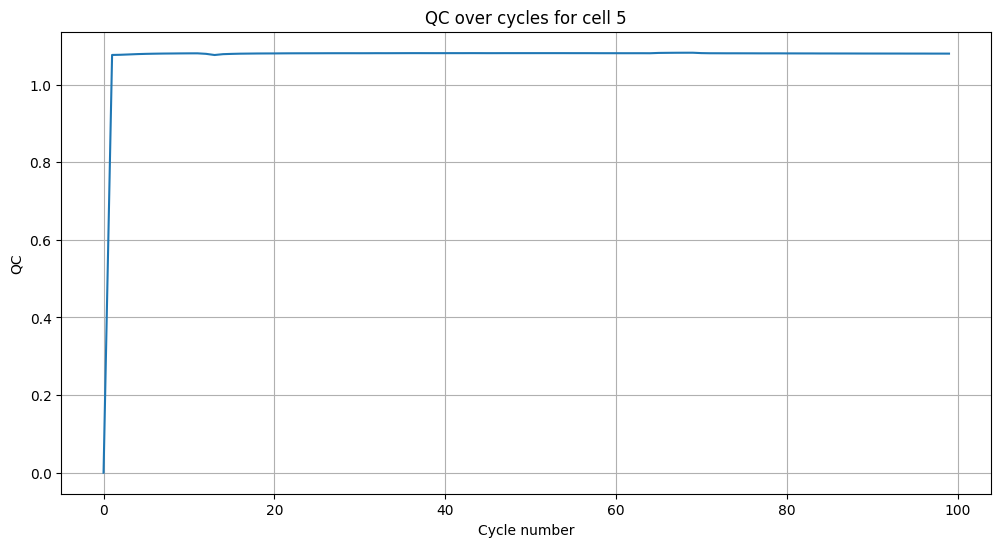

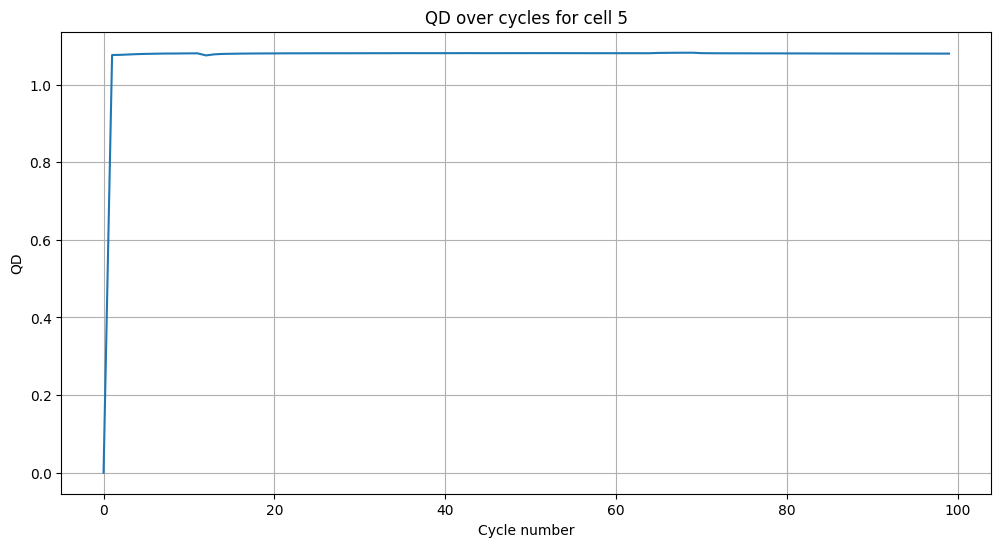

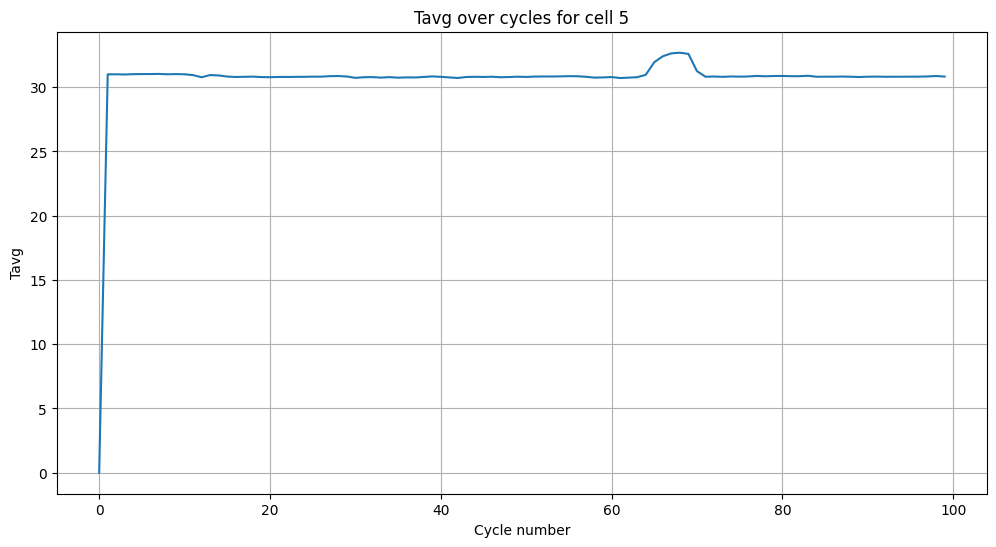

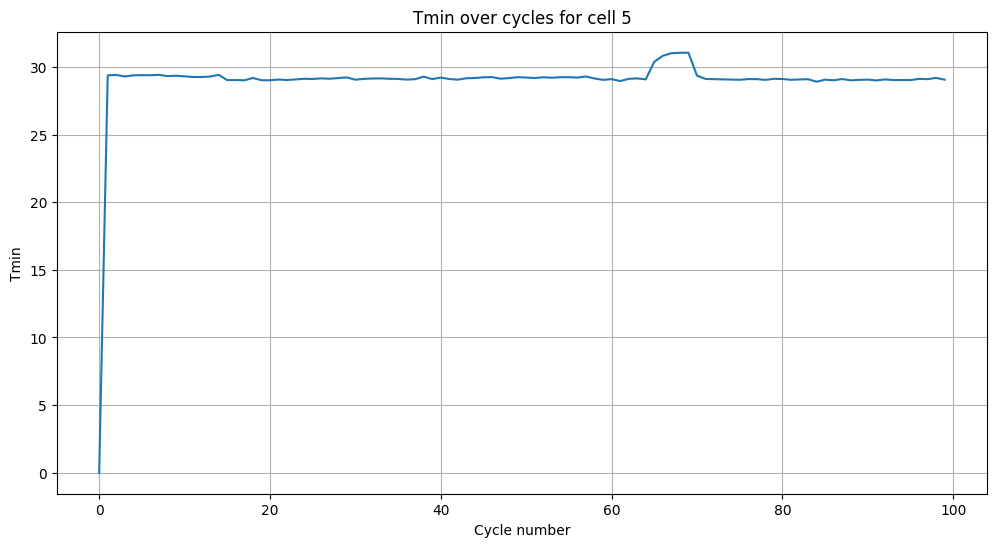

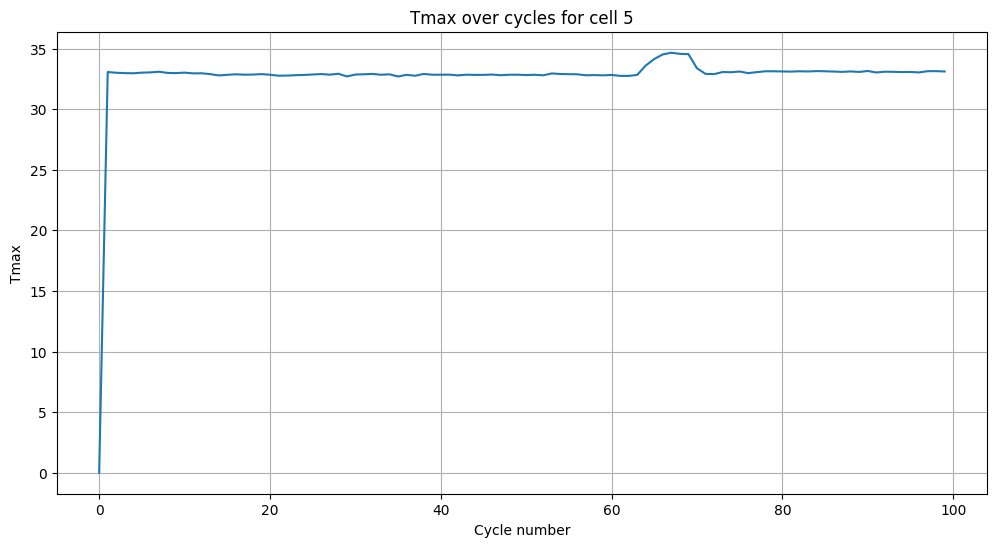

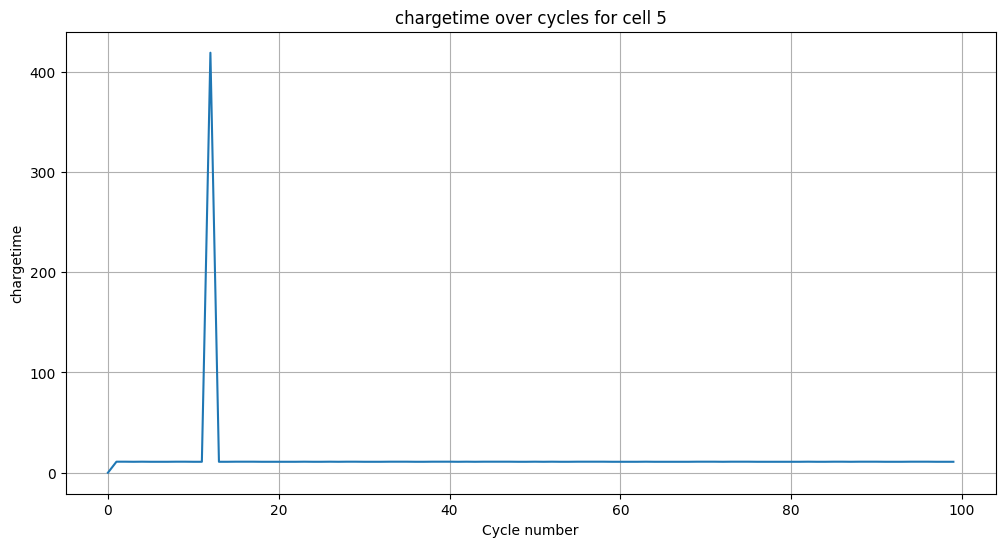

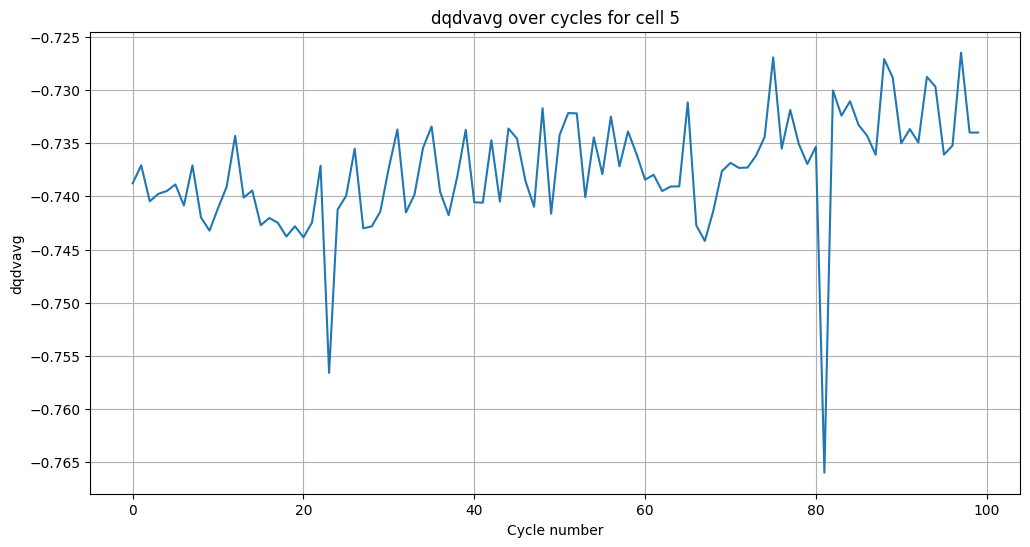

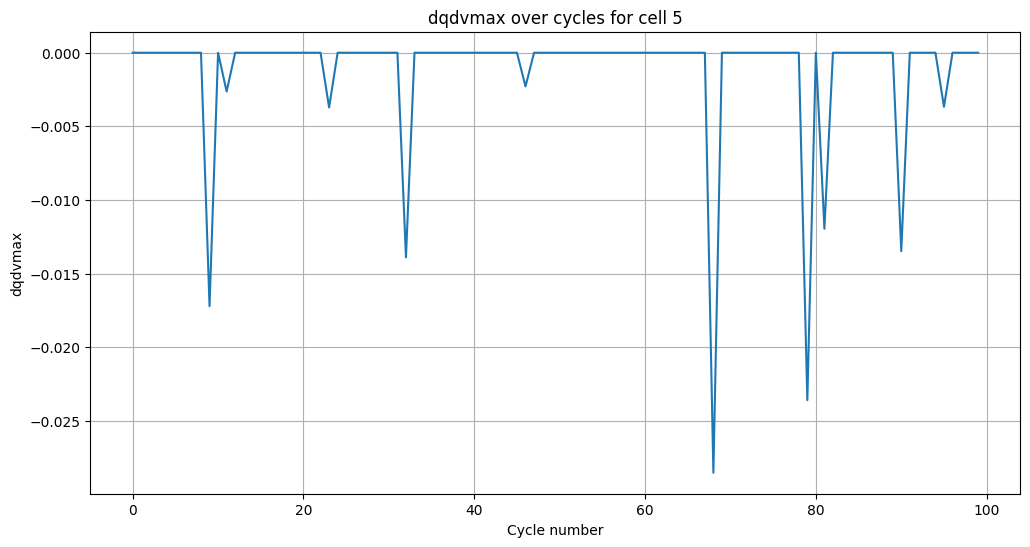

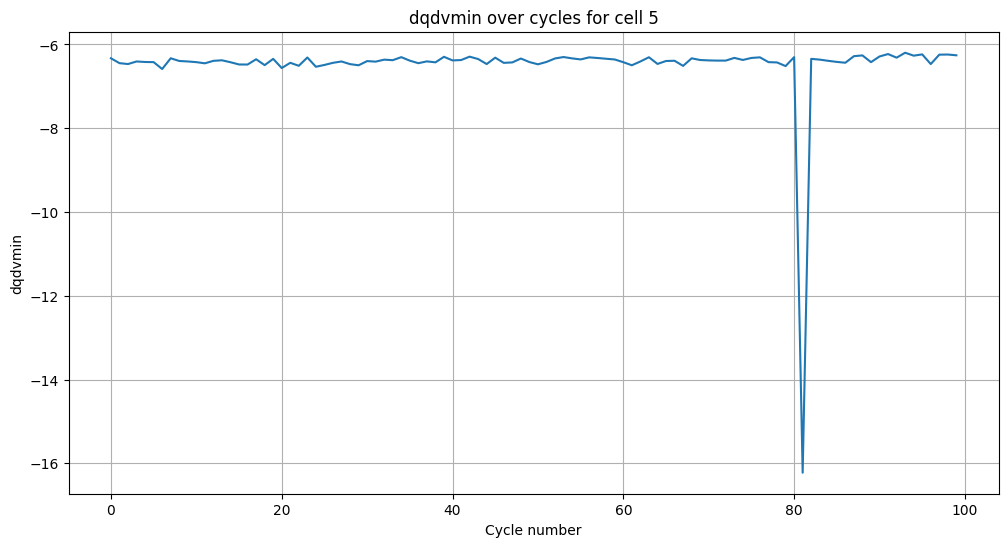

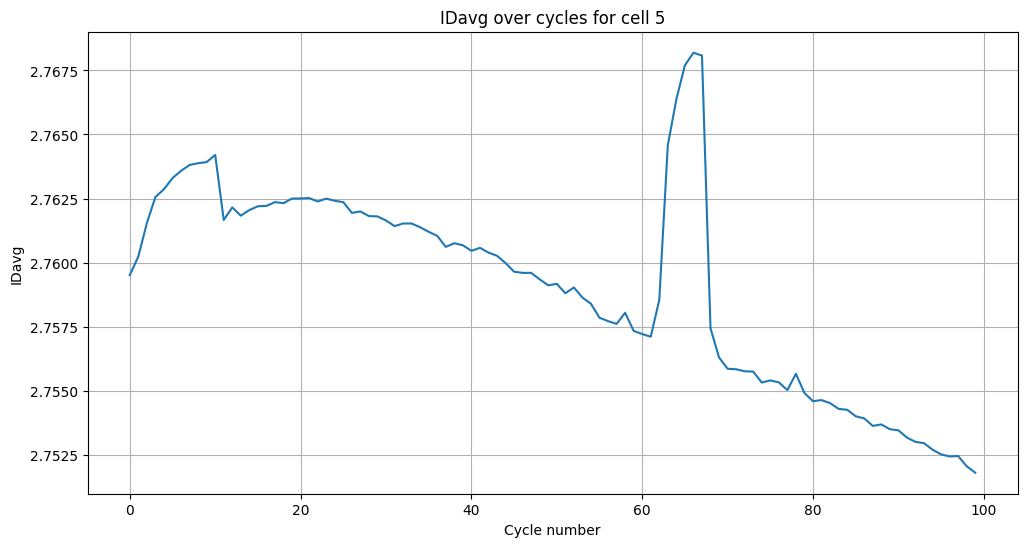

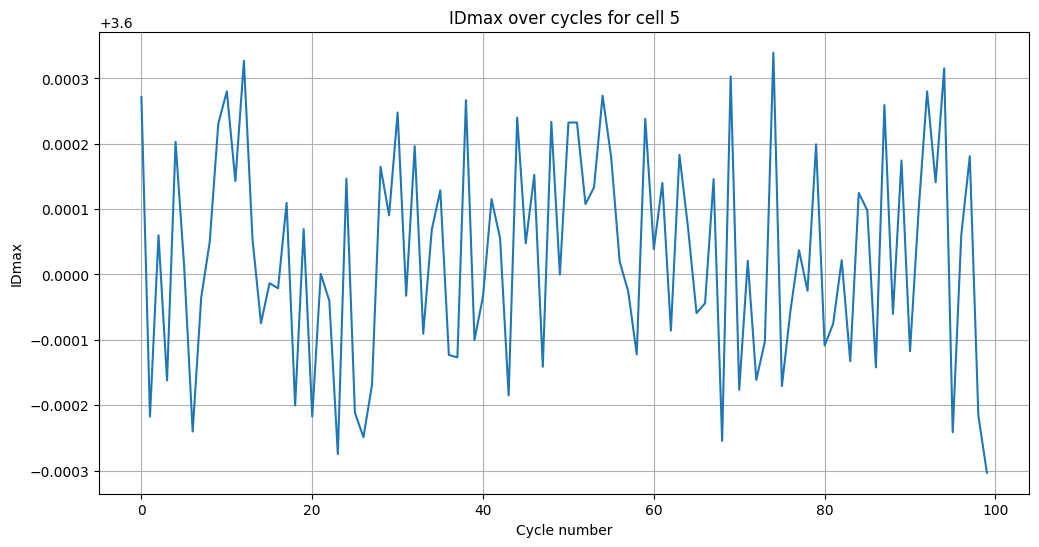

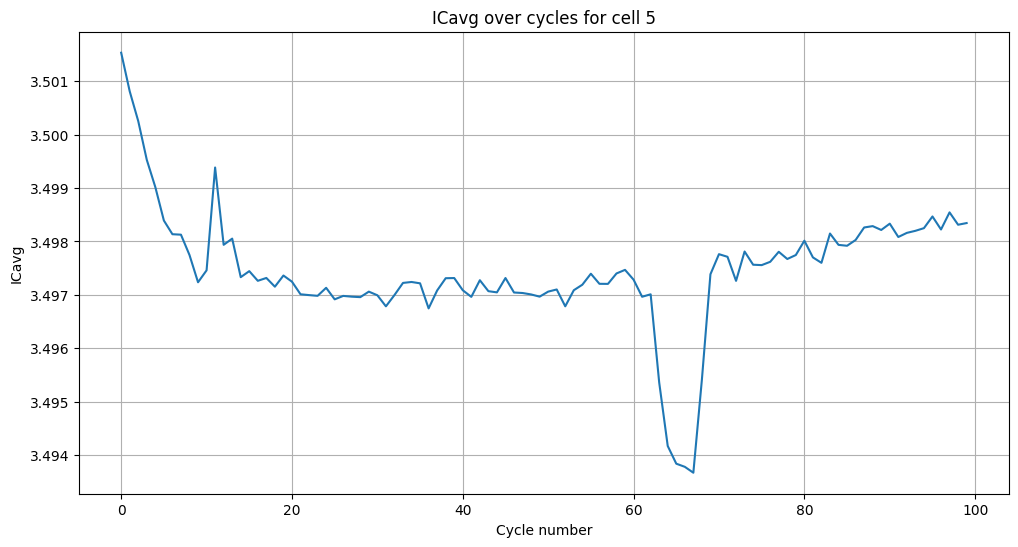

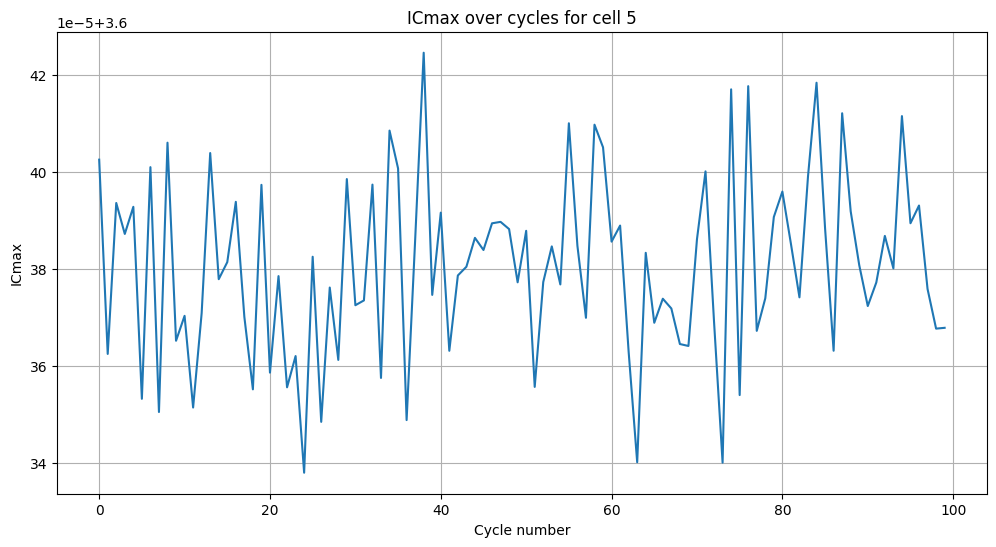

In [9]:
features = ["IR", "QC", "QD", "Tavg", "Tmin", "Tmax", "chargetime", "dqdvavg", "dqdvmax", "dqdvmin", "IDavg", "IDmax", "ICavg", "ICmax"]
fs.plot_features_over_cycles(new_cycle_sum, features, 5)

/content/drive/MyDrive/Colab_Notebooks/toyota_data/RUL_ML_Framework/preprocessing/feature_stat_lib.py:62: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


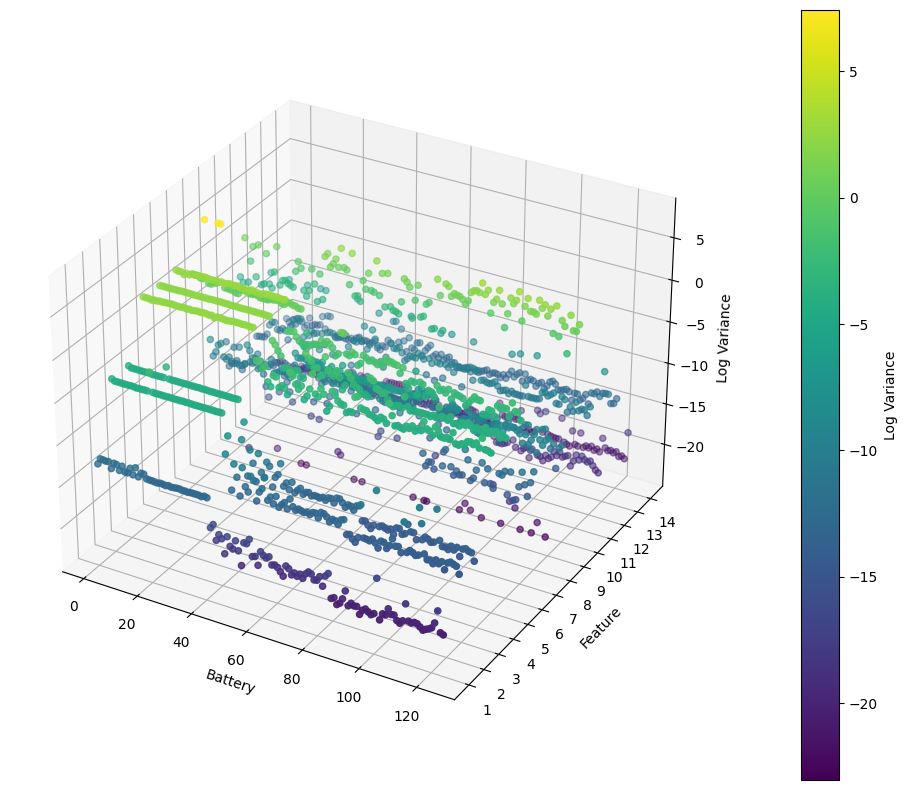

In [10]:
fs.plot_3d_variance_by_index(new_cycle_sum, features)

/content/drive/MyDrive/Colab_Notebooks/toyota_data/RUL_ML_Framework/preprocessing/feature_stat_lib.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


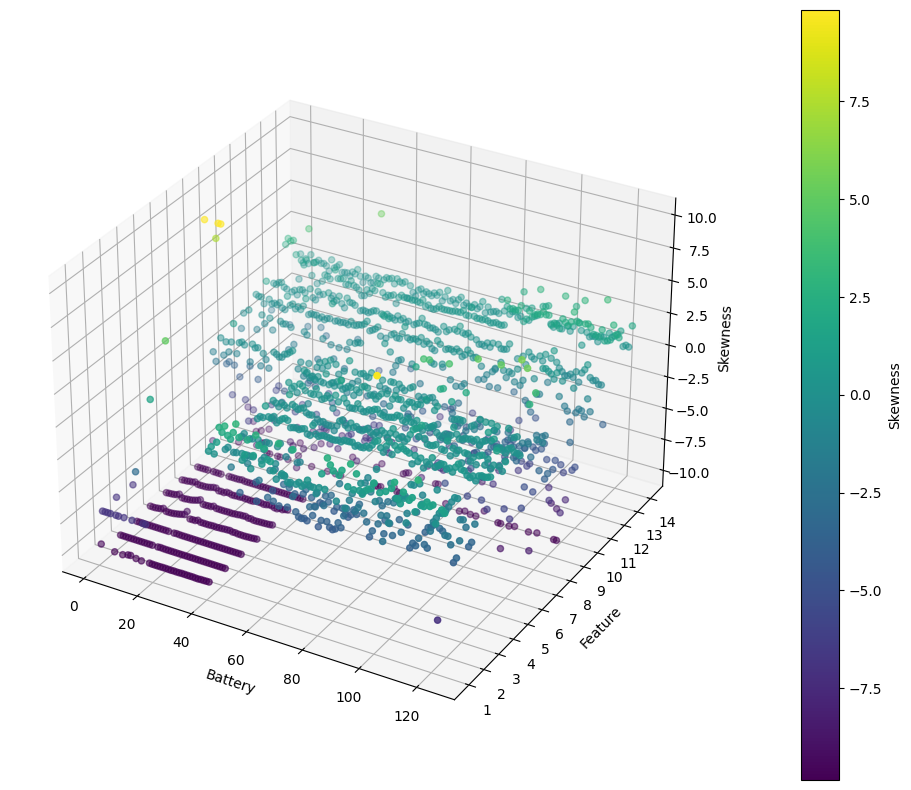

In [11]:
fs.plot_3d_skewness(new_cycle_sum, features)

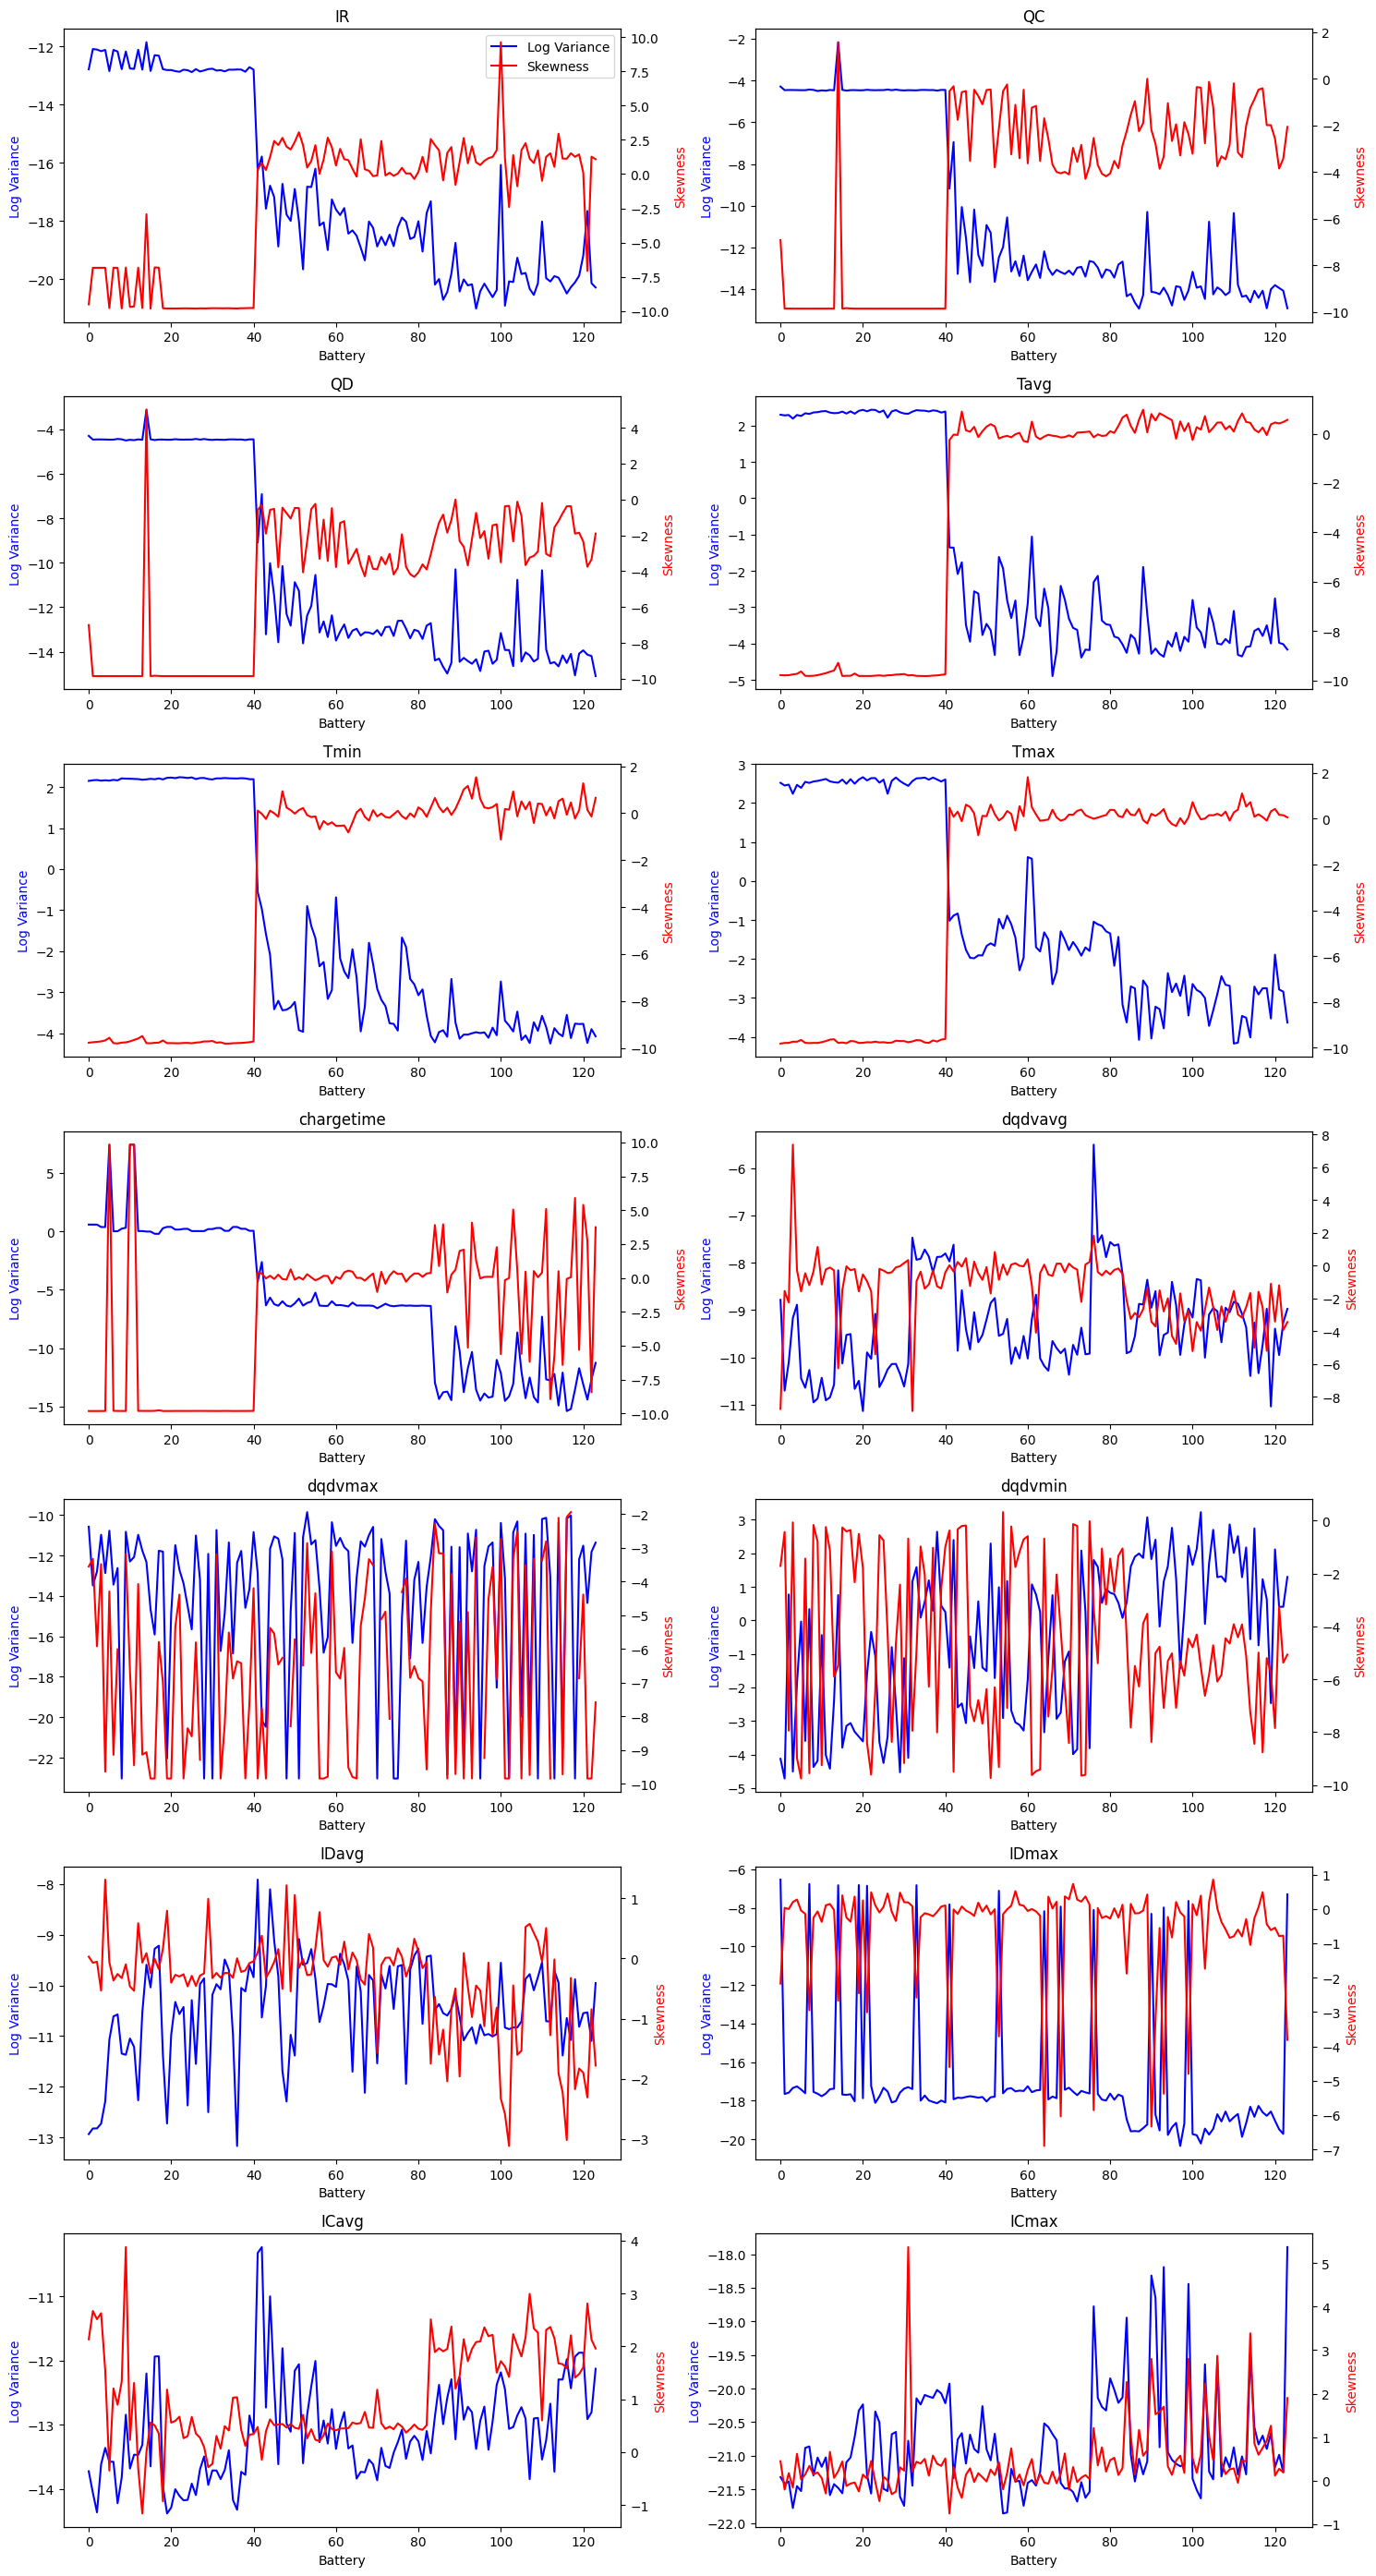

In [12]:
fs.plot_variance_and_skewness(new_cycle_sum, features)

While the values derived from reduced cycle spaces using methods like mean and variance serve as features in traditional machine learning models [1], their utility may be limited in deep neural networks (DNNs). </br>
DNNs inherently possess the capability to learn and represent intricate data patterns, often making manually engineered features redundant. </br>
Moreover, relying on such features imposes constraints on the cycle windows and dataset dependency. Despite these limitations, many studies continue to employ these features within DNN architectures.
My final goal is cycle-by-cycle RUL prediction. Thus, these methods are only used for feature analysis.

In [13]:
correlations_var_1 = fs.feature_correlations_dim_reduced(new_cycle_sum, eol, 1, method="var")
correlations_mean_1 = fs.feature_correlations_dim_reduced(new_cycle_sum, eol, 1, method="mean")
correlations_var_10 = fs.feature_correlations_dim_reduced(new_cycle_sum, eol, 10, method="var")
correlations_mean_10 = fs.feature_correlations_dim_reduced(new_cycle_sum, eol, 10, method="mean")

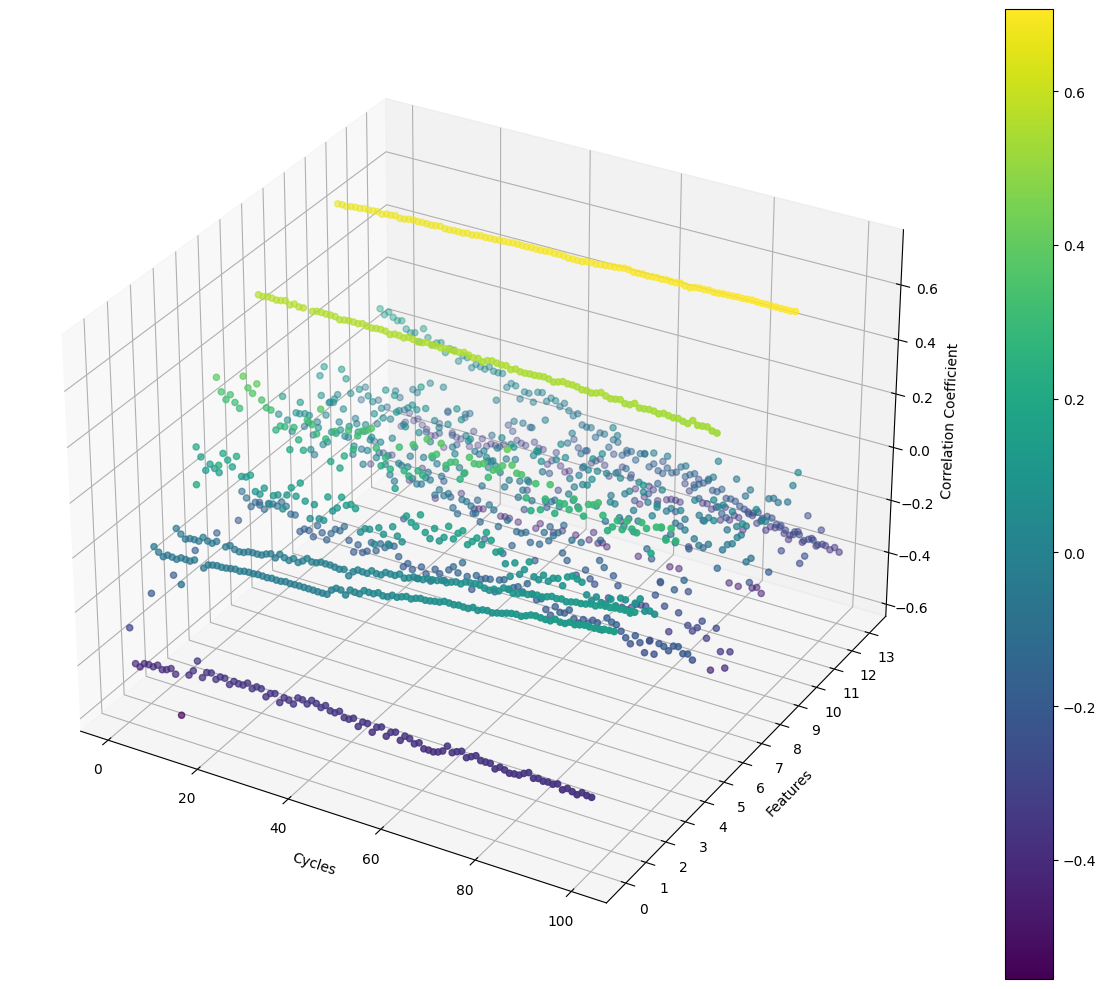

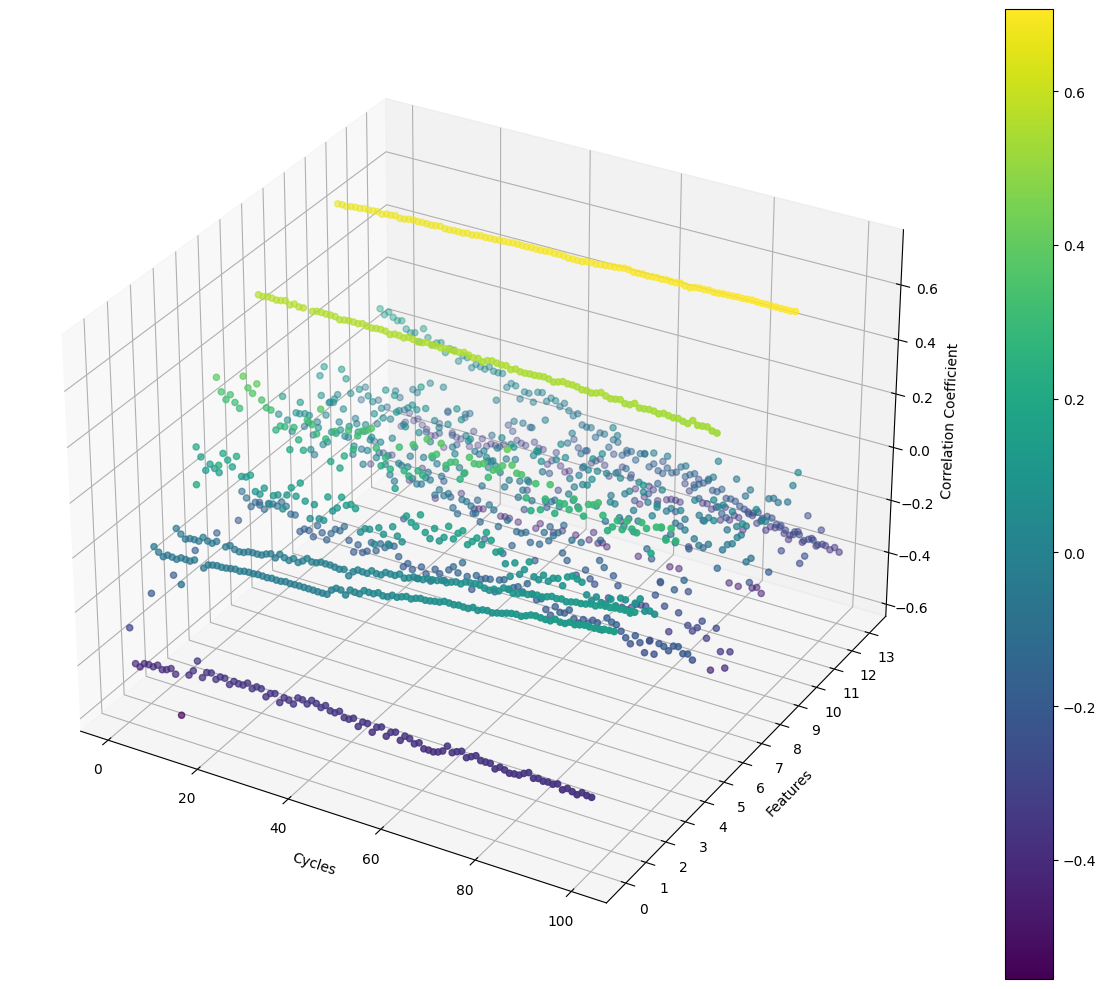

In [14]:
fs.plot_3d_correlation(correlations_var_1, reduced_dimension=1)
fs.plot_3d_correlation(correlations_mean_1, reduced_dimension=1)

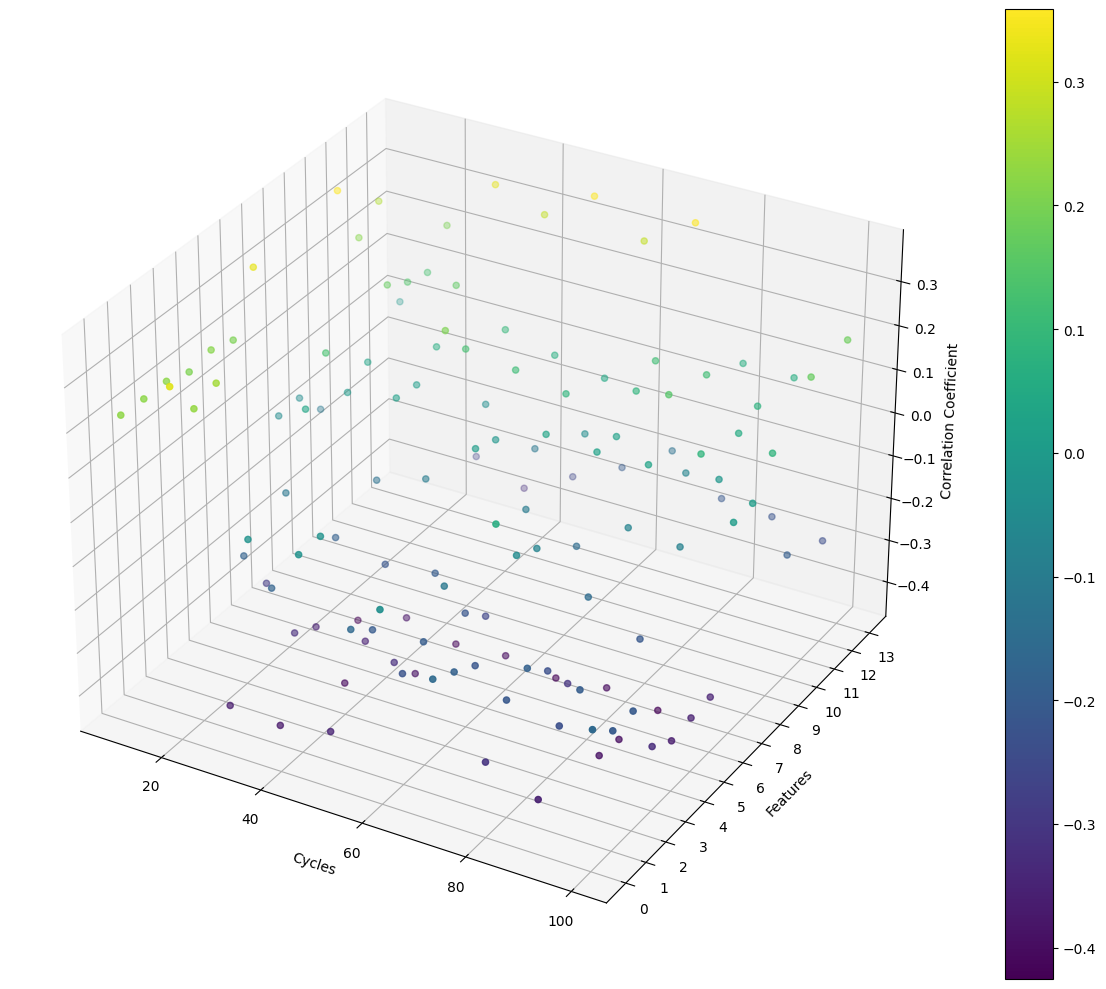

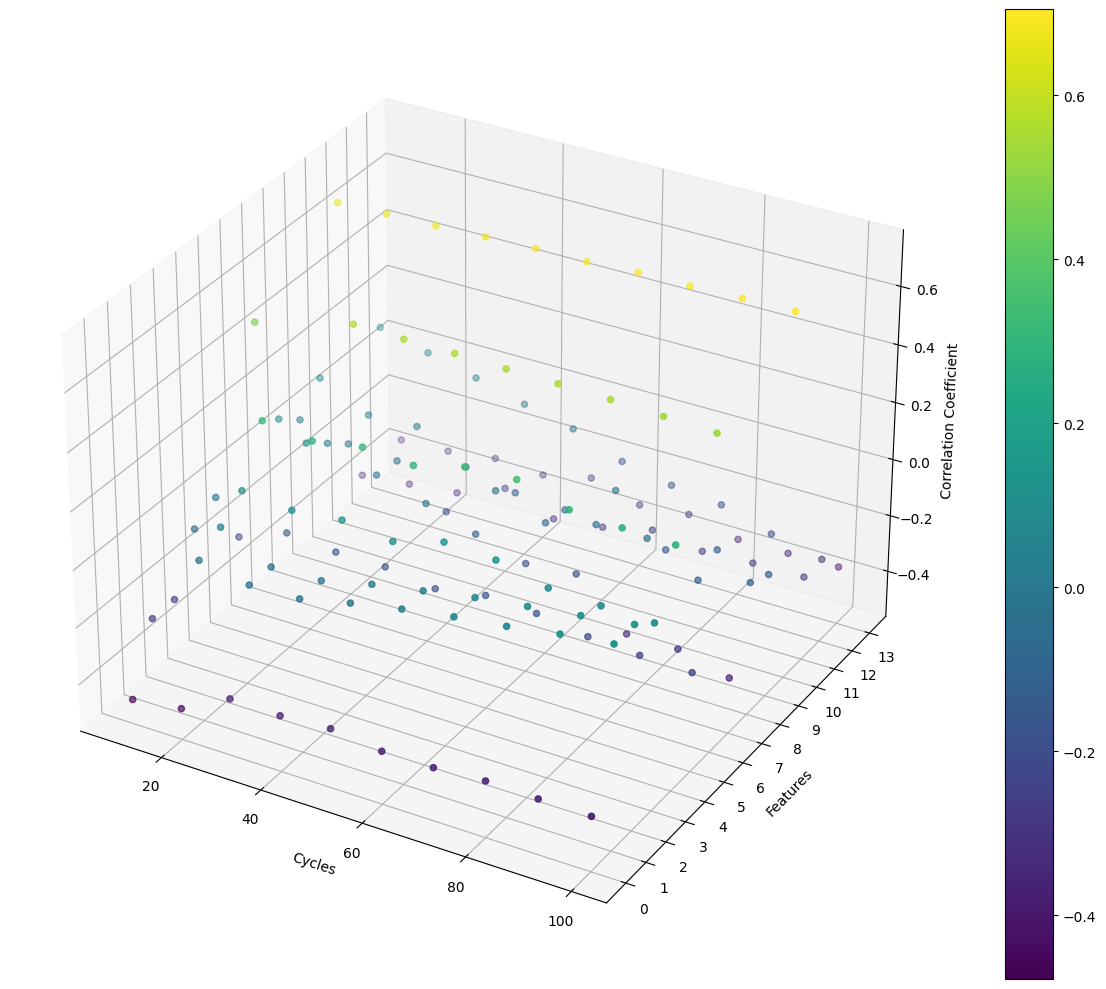

In [15]:
fs.plot_3d_correlation(correlations_var_10, reduced_dimension=10)
fs.plot_3d_correlation(correlations_mean_10, reduced_dimension=10)

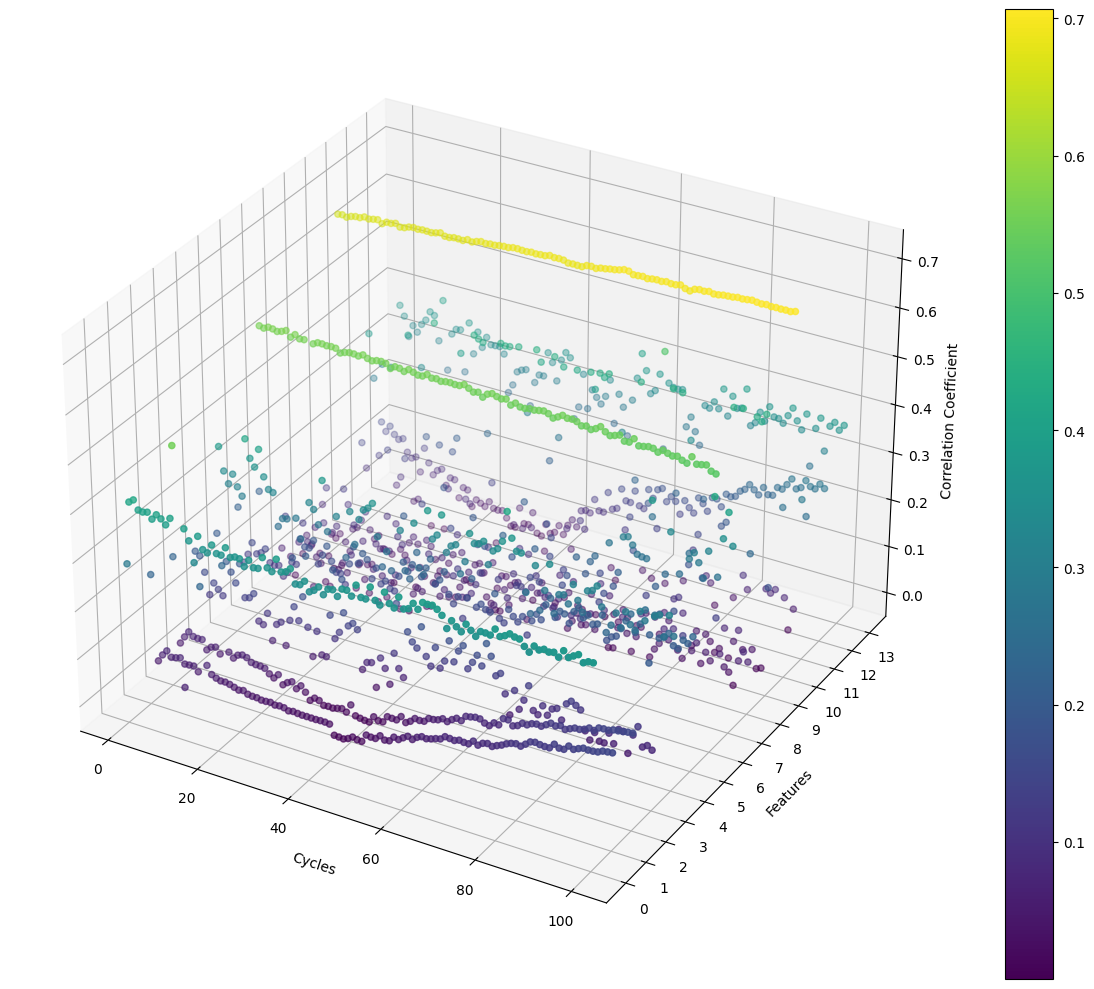

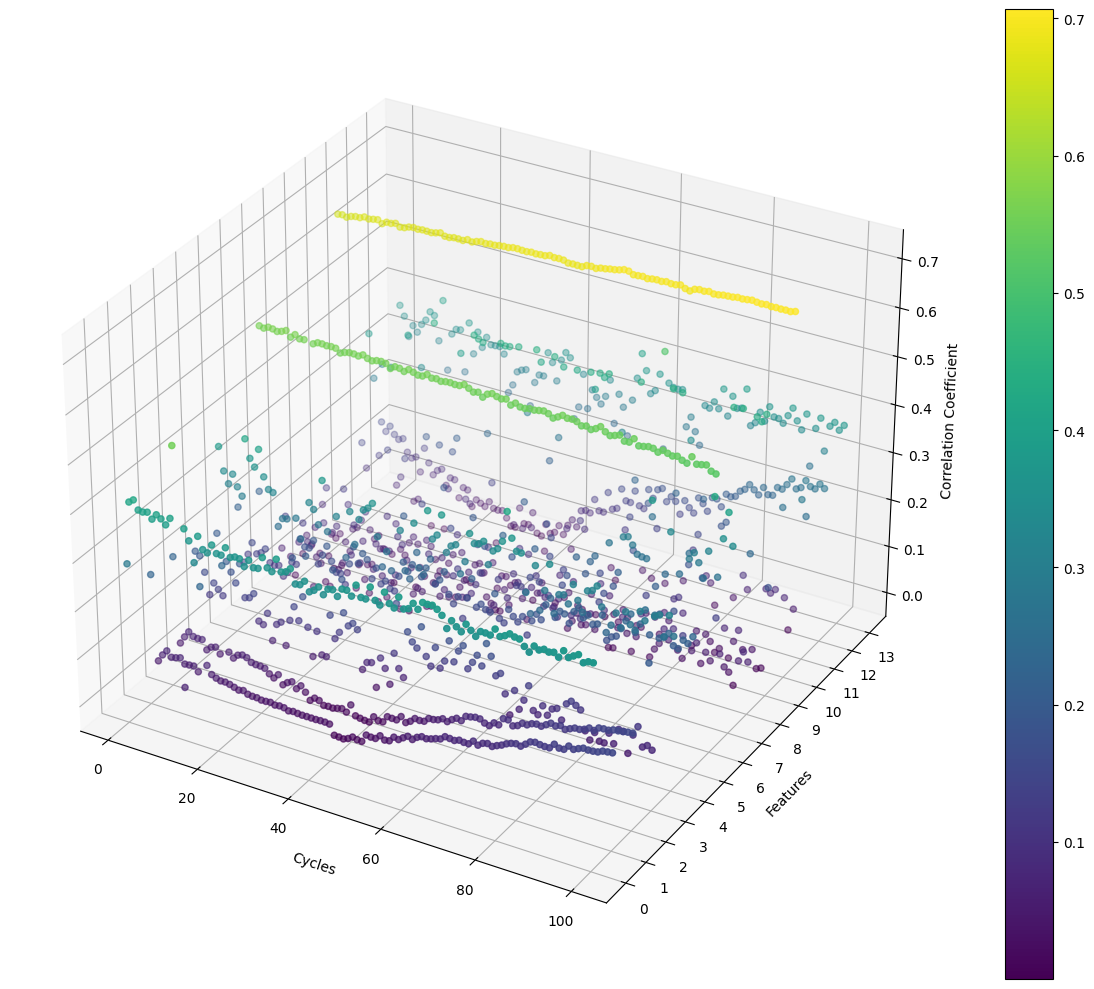

In [16]:
fs.plot_3d_correlation(np.abs(correlations_var_1), reduced_dimension=1)
fs.plot_3d_correlation(np.abs(correlations_mean_1), reduced_dimension=1)

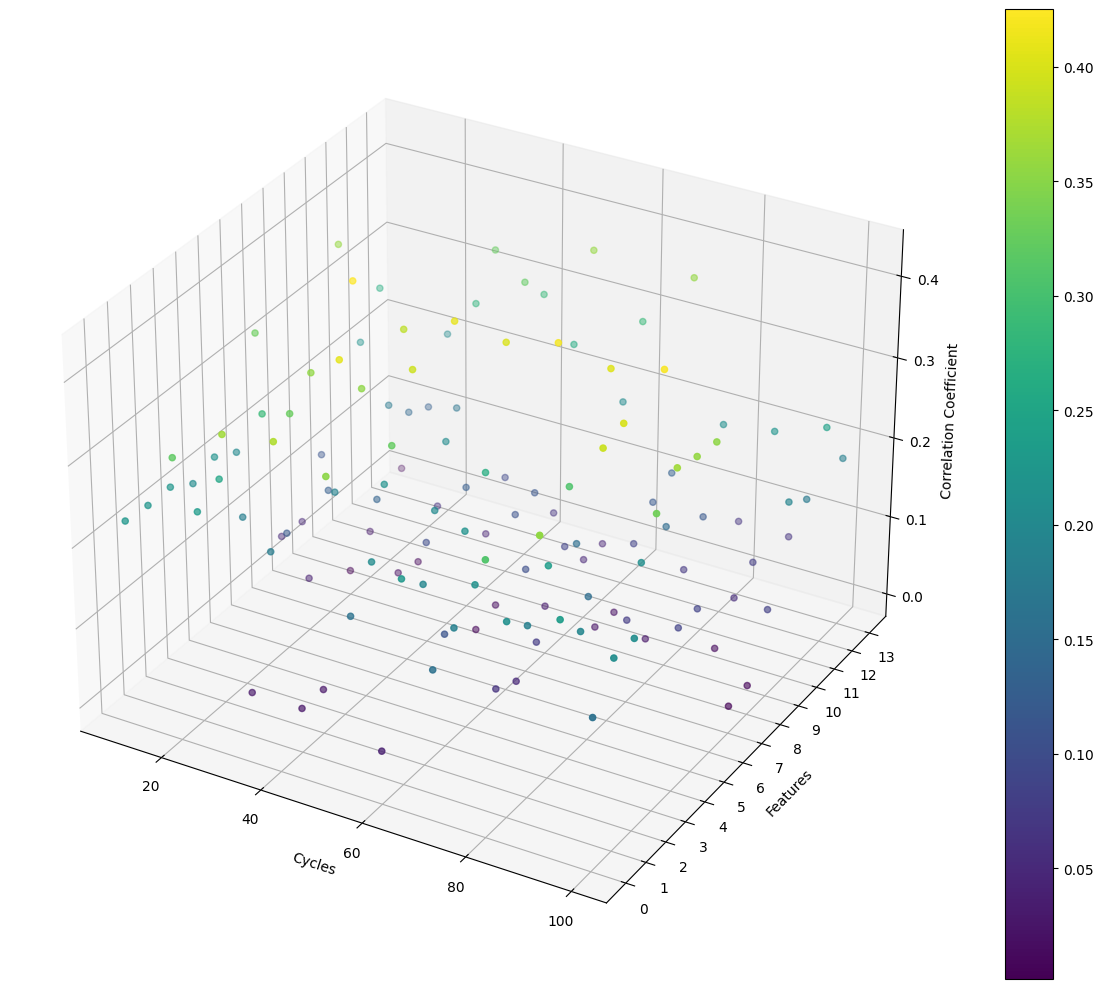

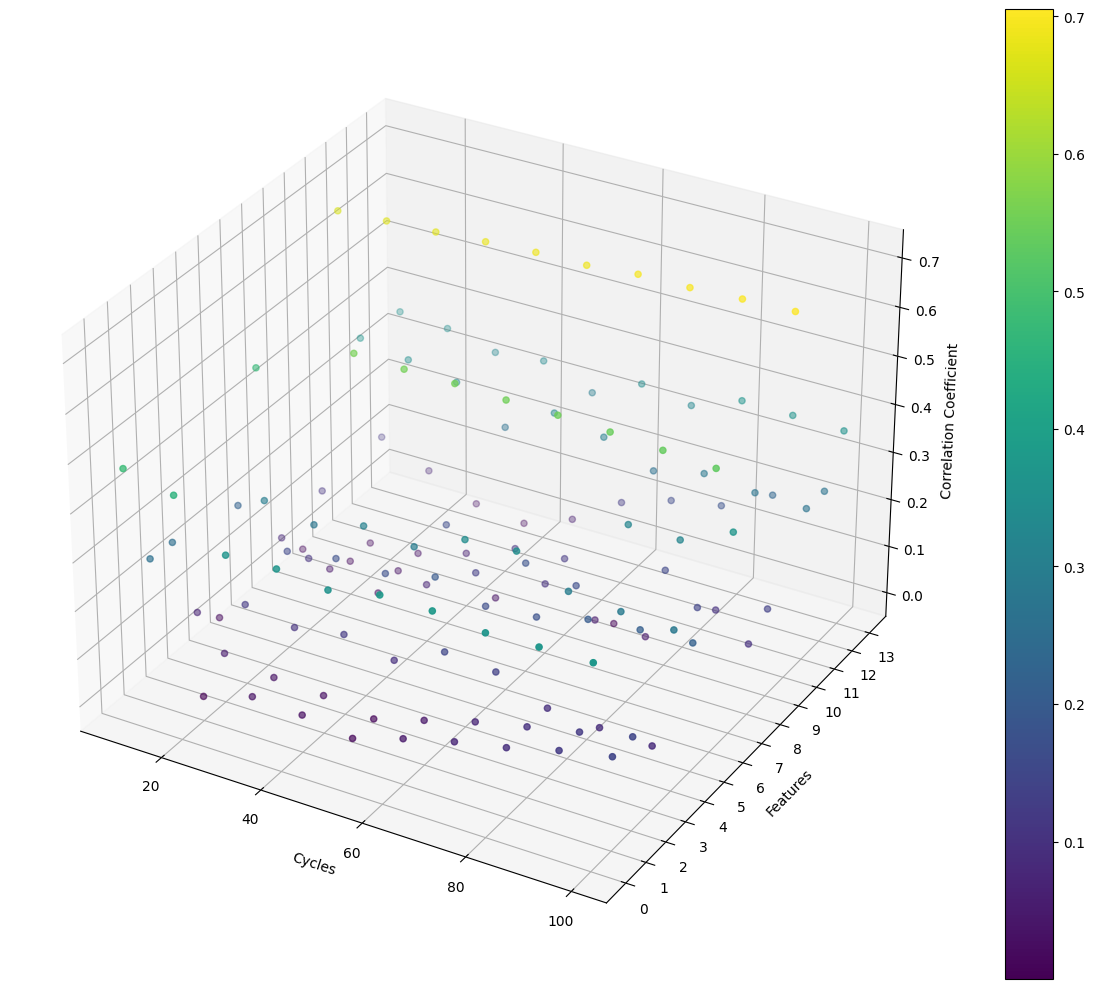

In [142]:
plot_3d_correlation(np.abs(correlations_var_10), reduced_dimension=10)
plot_3d_correlation(np.abs(correlations_mean_10), reduced_dimension=10)

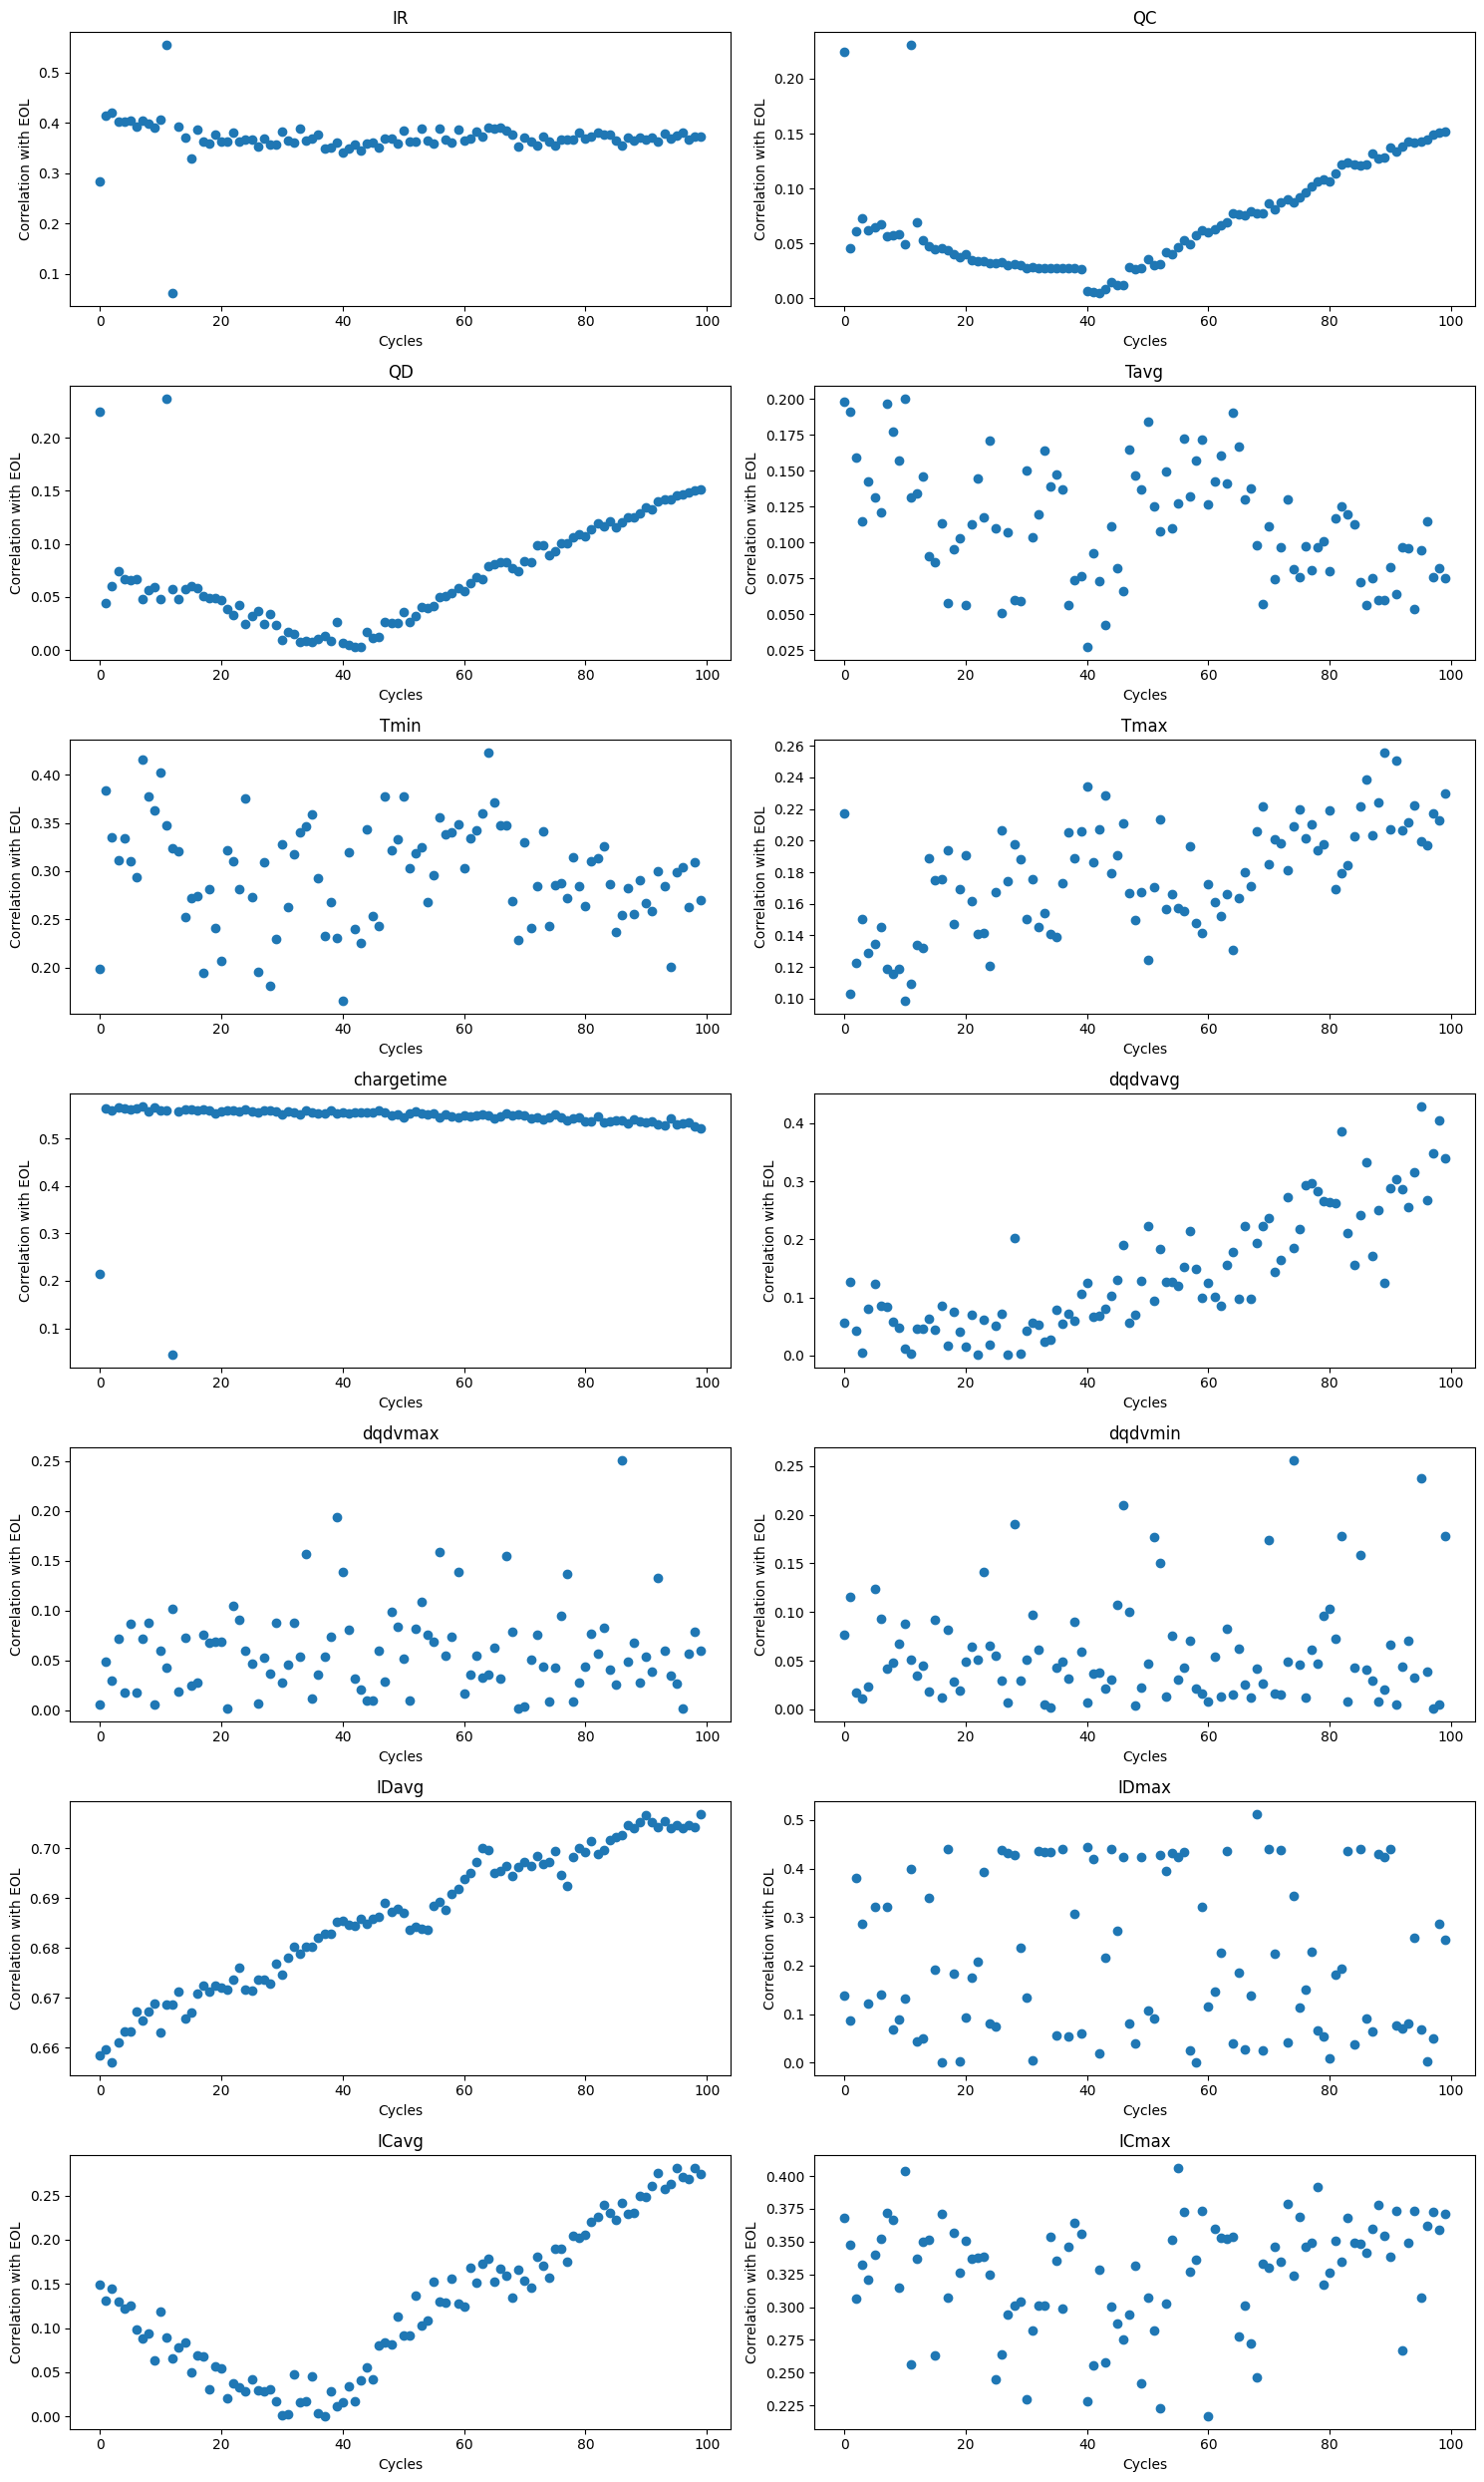

In [17]:
fs.plot_2d_feature_correlations(np.abs(correlations_mean_1), features)

Feature importance.

In [75]:
bfi = BatteryFeatureImportance(new_cycle_sum, eol, features)

In [76]:
bfi.train_model(regressor_choice='random_forest', n_estimators=500)

In [77]:
bfi.evaluate_model()

Training MSE: 6165.3665
Validation MSE: 33581.7407
Training RMSE: 78.5198
Validation RMSE: 183.2532
Training MAE: 43.6933
Validation MAE: 115.2972
Training MAPE: 5.2494
Validation MAPE: 18.2770


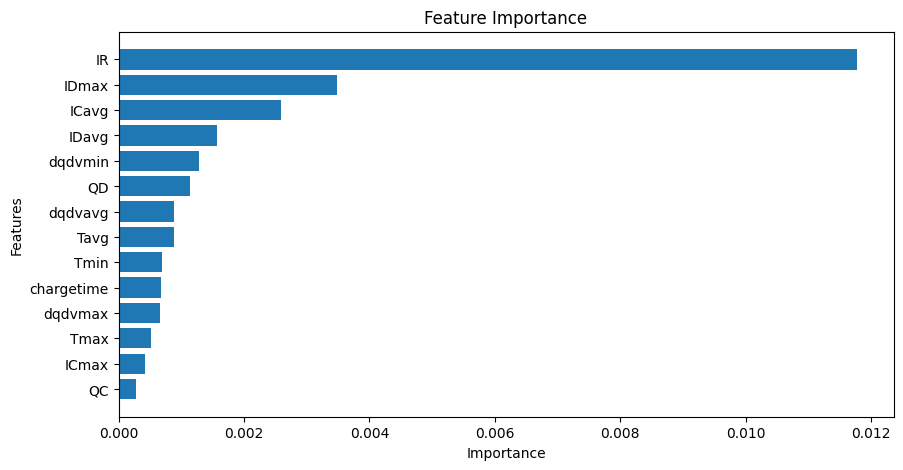

In [79]:
bfi.feature_importance(method='permutation', n_repeats=30)

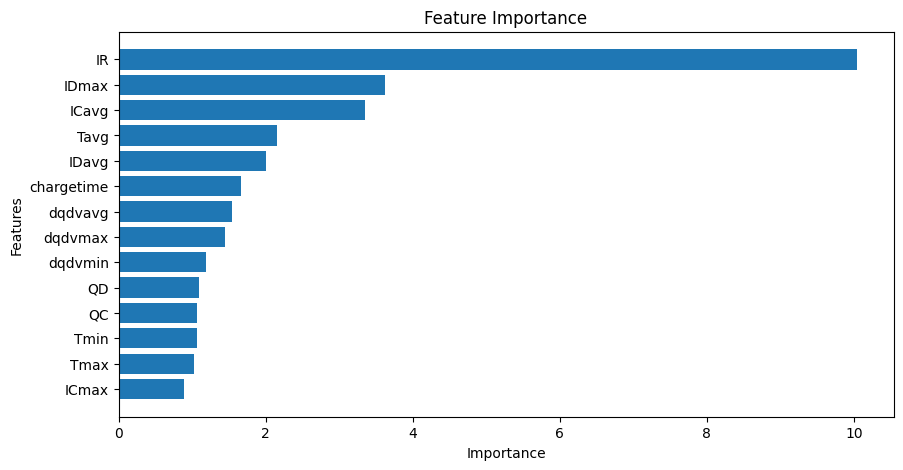

In [84]:
bfi.feature_importance(method='shap')

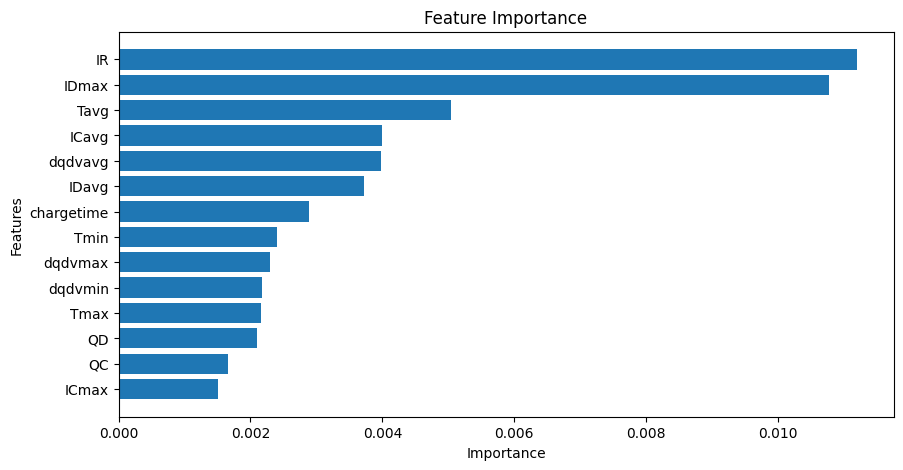

In [78]:
bfi.feature_importance(method='tree_importance')